# Demo Globygon

## Calculating the center-of-mass for the points

1. Convert each coordinate in RA $(\alpha_{\rm i})$/Dec $(\delta_{\rm i})$ to $x_{\rm i}$, $y_{\rm i}$, and $z_{\rm i}$ Cartesian coordinates: <br>
$$ 
x_{\rm i} = \cos\left( \delta_{\rm i} \right) \cos \left( \alpha_{\rm i} \right), \\ 
y_{\rm i} = \cos\left( \delta_{\rm i}  \right) \sin \left( \alpha_{\rm i} \right), \\
z_{\rm i} = \sin\left( \delta_{\rm i}  \right)
$$
2. Calculate the center-of-mass using the Cartesian coordinates, of which there are $N$ points:
$$
\langle x \rangle = \sum_{\rm i}^{\rm N} x_{\rm i}/N.
$$
3. Convert the $\langle x \rangle$/$\langle y \rangle$/$\langle z \rangle$ back into polar coordinates:
$$
\langle \delta \rangle = \sin^{-1} \left( \langle z \rangle / R \right) \\
\langle \alpha \rangle = \tan^{-1} \left( \langle x \rangle/\langle y \rangle \right), 
$$
where $R$ is given by $R = \sqrt{ \langle x \rangle^2 + \langle y \rangle^2 + \langle z \rangle^2 }$.

(0.579035274150633, -0.5450611401949198)


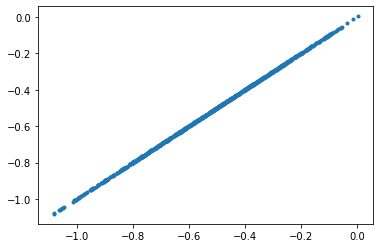

In [28]:
import numpy as np
from globygon import globygon as gb
import matplotlib.pyplot as plt 
degtorad = np.pi/180.

filename = "easysurvey.txt"
data = np.genfromtxt(filename, names=['ID', 'RA', 'DEC'], delimiter=' ')

index = 0
example_RA = data['RA']*degtorad
example_Dec = data['DEC']*degtorad

excat = gb.Catalog(example_RA,example_Dec)

x, y, z = excat._convert_RADec_to_Cartesian()
ra, dec = excat._convert_Cartesian_to_RADec(x, y, z)

plt.plot(example_Dec, dec, marker='.', ls='')

com = excat.calculate_center_of_mass()
print(com)

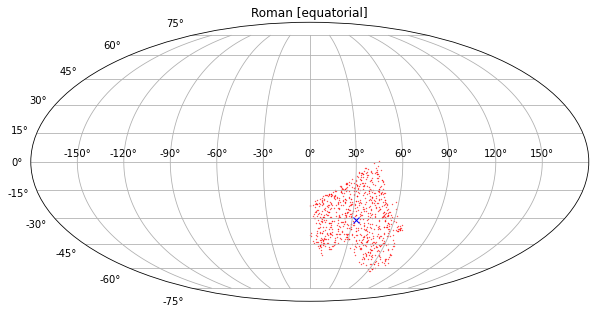

In [29]:
# Plot again to check
fig2 = plt.figure(figsize=[10,7])
ax1 = fig2.add_subplot(111, projection="mollweide")

ax1.scatter((example_RA),example_Dec,s=0.1,c='r') # pointings
ax1.plot(com[0],com[1],'bx')

plt.title("Roman [equatorial]")
plt.grid(True)

plt.show()

1.5707963267948966 0.8676046802878152


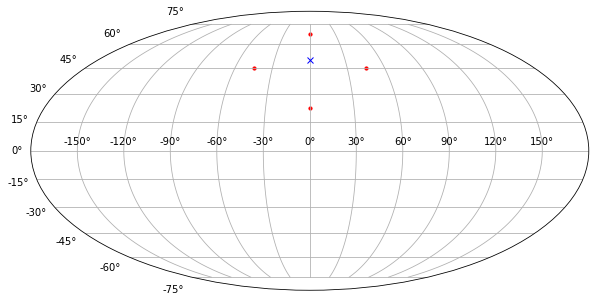

In [30]:
# Plot again to check
fig2 = plt.figure(figsize=[10,7])
ax1 = fig2.add_subplot(111, projection="mollweide")

example2_RA = np.array([-np.pi/4., np.pi/4., 0., 0.,]) #example_RA = np.array([0., 0.,])
example2_Dec = np.array([0., 0., -np.pi/8., np.pi/8.]) + np.pi/4. # example_Dec = np.array([-np.pi/8., np.pi/8.]) + np.pi/4.

ex2cat = gb.Catalog(example2_RA,example2_Dec)
com2 = ex2cat.calculate_center_of_mass()

ax1.scatter(example2_RA, example2_Dec,s=10,c='r') # pointings
ax1.plot(com2[0],com2[1],'bx')

print(np.pi/2., com2[1])

plt.grid(True)
plt.show()

(x+0.000)^2+(y-1.207)^2 = 0.866^2


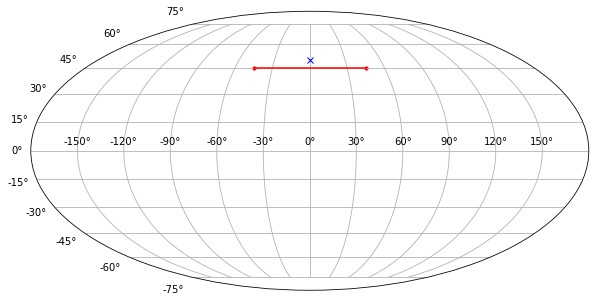

In [32]:
fig3 = plt.figure(figsize=[10,7])
ax1 = fig3.add_subplot(111, projection="mollweide")

example3_RA = np.array([-np.pi/4., np.pi/4.])
example3_Dec = np.array([0., 0.]) + np.pi/4.

ex3cat = gb.Catalog(example3_RA,example3_Dec)
x3,y3,z3 = ex3cat._convert_RADec_to_Cartesian()
com3 = ex2cat.calculate_center_of_mass()

ax1.scatter(example3_RA, example3_Dec,s=10,c='r') # pointings
ax1.plot(com3[0],com3[1],'bx')
ax1.plot(example3_RA, example3_Dec,c='r') # pointings

# Get great circle equation

# Generate 

# Convert points to RA/Dec

# Plot

plt.grid(True)
plt.show()

Brian Jackson & Dida Markovic, 2021

In [23]:
%reset

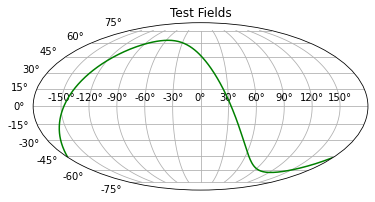

In [26]:


import numpy as np
import pylab as pl
import math

# the spot to plot
#x = np.array([-37, 88, -137, -139, -136, -44]) # longitude
#y = np.array([27, -60, -1.4, -50, -77, -46]) # latitude
#lab = ['TF0.1', 'TF0.2', 'TF0.3', 'TF0.4', 'TF0.5', 'TF0.6' ]

# To plot the celestial equator in galactic coordinates
degtorad = math.pi/180.
alpha = np.arange(-180,180.,1.)
alpha *= degtorad
# From Meeus, Astronomical algorithms (with delta = 0)
x1 = np.sin(192.25*degtorad - alpha)
x2 = np.cos(192.25*degtorad - alpha)*np.sin(27.4*degtorad)
yy = np.arctan2(x1, x2)
longitude = 303*degtorad - yy 
x3 = np.cos(27.4*degtorad) * np.cos(192.25*degtorad - alpha)
latitude  = np.arcsin(x3)

# We put the angles in the right direction
for i in range(0,len(alpha)):
    if longitude[i] > 2.*math.pi:
        longitude[i] -= 2.*math.pi
    longitude[i] -= math.pi
    latitude[i] = -latitude[i]

# To avoid a line in the middle of the plot (the curve must not loop)
for i in range(0,len(longitude)-1):
    if (longitude[i] * longitude[i+1] < 0 and longitude[i] > 170*degtorad and longitude[i+1] < -170.*degtorad):
        indice = i
        break

# The array is put in increasing longitude 
longitude2 = np.zeros(len(longitude))
latitude2 = np.zeros(len(latitude))
longitude2[0:len(longitude)-1-indice] = longitude[indice+1:len(longitude)]
longitude2[len(longitude)-indice-1:len(longitude)] = longitude[0:indice+1]
latitude2[0:len(longitude)-1-indice] = latitude[indice+1:len(longitude)]
latitude2[len(longitude)-indice-1:len(longitude)] = latitude[0:indice+1]

#xrad = x * degtorad
#yrad = y * degtorad

fig2 = pl.figure(2)
ax1 = fig2.add_subplot(111, projection="mollweide")

#ax1.scatter(xrad,yrad)
#ax1.plot([-math.pi, math.pi], [0,0],'r-')
#ax1.plot([0,0],[-math.pi, math.pi], 'r-')

ax1.plot(longitude2,latitude2,'g-') 
#for i in range(0,6):
#    ax1.text(xrad[i], yrad[i], lab[i])
pl.title("Test Fields")
pl.grid(True)
